In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [ ]:


# Define the path to your CSV file 

file_path = r'data\processed\co2_emission_preprocessed.csv'



# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

# Check basic information about the dataset
print(df.info())


       Country  Year  Population       CO2    Coal_CO2     Oil_CO2  Gas_CO2  \
0  Afghanistan  1850    0.000471  0.005472  156.963928  112.920677  51.2781   
1  Afghanistan  1851    0.000472  0.005476  156.963928  112.920677  51.2781   
2  Afghanistan  1852    0.000474  0.005480  156.963928  112.920677  51.2781   
3  Afghanistan  1853    0.000477  0.005483  156.963928  112.920677  51.2781   
4  Afghanistan  1854    0.000479  0.005487  156.963928  112.920677  51.2781   

   Cement_CO2  Flaring_CO2  Other_Industry_CO2  CO2_per_capita  
0    9.109399     3.636449           17.499371        0.000006  
1    9.109399     3.636449           17.499371        0.000006  
2    9.109399     3.636449           17.499371        0.000006  
3    9.109399     3.636449           17.499371        0.000006  
4    9.109399     3.636449           17.499371        0.000006  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47415 entries, 0 to 47414
Data columns (total 11 columns):
 #   Column              N

In [118]:
# Example list of countries (you can expand this list as needed)
countries_list = [
    'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 
    'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 
    'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 
    'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba', 
    'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 
    'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 
    'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Colombia', 
    'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 
    'Curacao', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 
    'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 
    'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 
    'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong', 
    'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 
    'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kosovo', 'Kuwait', 
    'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 
    'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 
    'Mauritania', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 
    'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 
    'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Panama', 'Papua New Guinea', 'Paraguay', 
    'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda', 'Saint Lucia', 
    'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 
    'Senegal', 'Serbia', 'Seychelles', 'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands', 
    'Somalia', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden', 
    'Switzerland', 'Syria', 'Taiwan', 'Tajikistan', 'Tanzania', 'Thailand', 'Togo', 'Trinidad and Tobago', 
    'Tunisia', 'Turkey', 'Turkmenistan', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 
    'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Vatican', 'Venezuela', 'Vietnam', 'Yemen', 
    'Zambia', 'Zimbabwe'
]

# Filter the DataFrame to keep only rows with countries in the countries_list 
df = df[(df['Country'].isin(countries_list)) & (df['Year'] > 1950)]




<Axes: title={'center': 'CO2 Emissions by Source Over Time'}, xlabel='Year', ylabel='CO2 Emissions'>

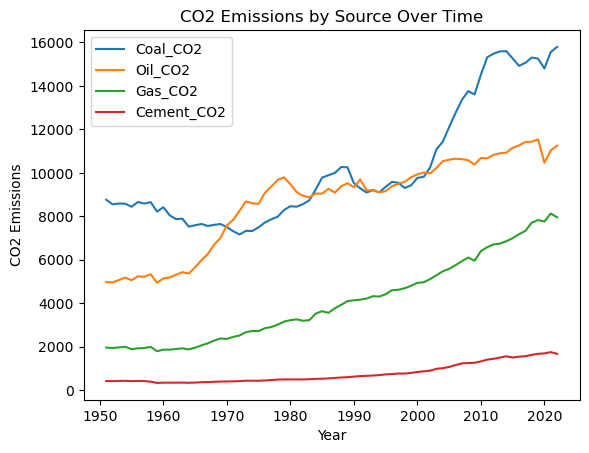

In [119]:
source_trends = df.groupby('Year')[['Coal_CO2', 'Oil_CO2', 'Gas_CO2', 'Cement_CO2']].sum()
source_trends.plot(title='CO2 Emissions by Source Over Time', xlabel='Year', ylabel='CO2 Emissions')


C:\Users\manis\AppData\Local\Temp\ipykernel_24640\3512294861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CO2_per_capita'] = df['CO2'] / df['Population']


<Axes: title={'center': 'Average CO2 Emissions Per Capita Over Time'}, xlabel='Year', ylabel='CO2 Per Capita'>

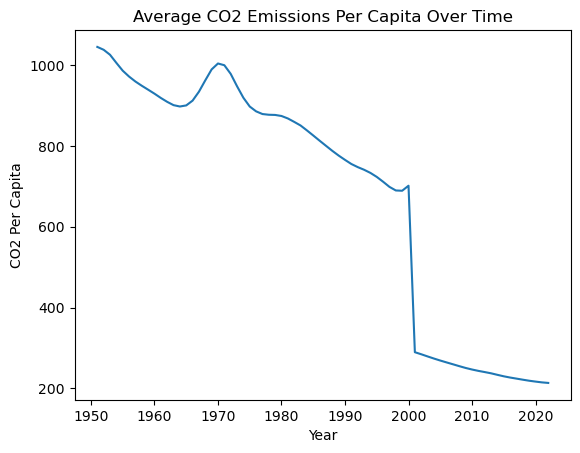

In [120]:
df['CO2_per_capita'] = df['CO2'] / df['Population']
per_capita = df.groupby('Year')['CO2_per_capita'].mean()
per_capita.plot(title='Average CO2 Emissions Per Capita Over Time', xlabel='Year', ylabel='CO2 Per Capita')


In [121]:
corr_matrix = df[['CO2', 'Coal_CO2', 'Oil_CO2', 'Gas_CO2', 'Population', 'Cement_CO2']].corr()
print(corr_matrix)


                 CO2  Coal_CO2   Oil_CO2   Gas_CO2  Population  Cement_CO2
CO2         1.000000  0.470639  0.718778  0.728670    0.469932    0.290931
Coal_CO2    0.470639  1.000000  0.641900  0.488686    0.716573    0.926546
Oil_CO2     0.718778  0.641900  1.000000  0.900318    0.430317    0.418145
Gas_CO2     0.728670  0.488686  0.900318  1.000000    0.280676    0.270989
Population  0.469932  0.716573  0.430317  0.280676    1.000000    0.660595
Cement_CO2  0.290931  0.926546  0.418145  0.270989    0.660595    1.000000


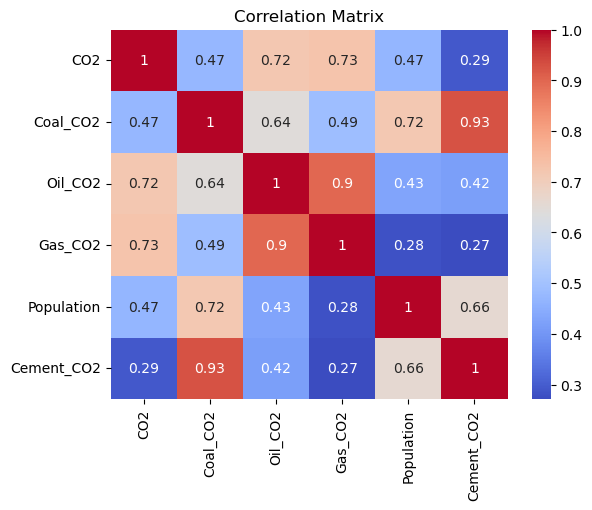

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Key Insights from the Heatmap:

Fossil fuel-based sources (coal, oil, gas) show strong correlations with CO₂ emissions, indicating that they are major contributors to total CO₂ levels.
Cement emissions, while contributing to CO₂, show a weaker correlation with CO₂ emissions compared to fossil fuels.
The population has moderate correlations with emission sources, particularly coal and cement, which are affected by industrial and infrastructural activities. However, the population's impact on gas and oil is weaker in comparison.

# Investigate how each emission source contributes to the total CO2 emissions 

since dataset it too large, sampling to do analysis

In [131]:
# Randomly sample 10,000 rows from your dataset
df_sample = df.sample(n=10000, random_state=42)
df_sample.head()

,Country,Year,Population,CO2,Coal_CO2,Oil_CO2,Gas_CO2,Cement_CO2,Flaring_CO2,Other_Industry_CO2,CO2_per_capita
12657,Egypt,1991,0.007349,0.005808,2.696577,51.839489,14.904449,7.855327,0.0,17.499371,0.790329
26340,Mali,2011,0.002011,0.007479,0.000000,2.279008,0.000000,0.000000,0.0,17.499371,3.718566
23970,Liberia,2021,0.000651,0.007733,0.000000,0.657946,0.000000,0.207309,0.0,17.499371,11.874785
22750,Kyrgyzstan,2021,0.000818,0.005948,3.525582,4.088981,0.648528,1.170713,0.0,17.499371,7.266852
13517,Eswatini,1982,0.000080,0.005781,0.436016,0.000000,0.000000,0.000000,0.0,17.499371,72.688011


1. Feature Importance Analysis using Random Forest

C:\Users\manis\AppData\Local\Temp\ipykernel_24640\3665503488.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df_sample, palette='coolwarm')


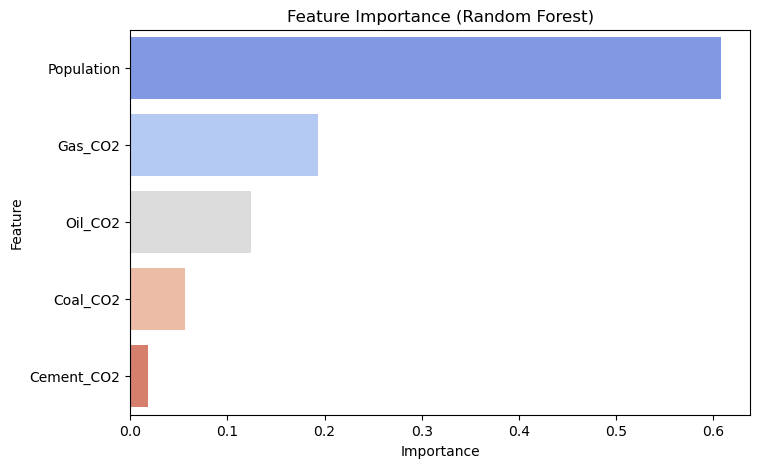

In [140]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and target variable
X = df_sample[['Coal_CO2', 'Oil_CO2', 'Gas_CO2', 'Cement_CO2', 'Population']]
y = df_sample['CO2']

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Extract feature importances
feature_importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
importance_df_sample = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df_sample.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df_sample, palette='coolwarm')
plt.title('Feature Importance (Random Forest)')
plt.show()

Population has the highest importance score, indicating it is the most significant factor driving CO₂ emissions. This is logical since higher population density tends to correlate with higher energy consumption.

Gas_CO₂ emissions is the second most important feature, highlighting that gas plays a major role in contributing to CO₂ emissions.

Oil_CO₂ is also a significant contributor but less so than Gas_CO₂.

Cement_CO₂, Oil_CO₂ have relatively lower importance, suggesting they are less impactful in driving overall CO₂ emissions.


*Targeting emissions reductions in sectors related to population growth (urban planning, public transport) and oil consumption (promoting renewables) could have a significant impact on overall CO₂ levels.*

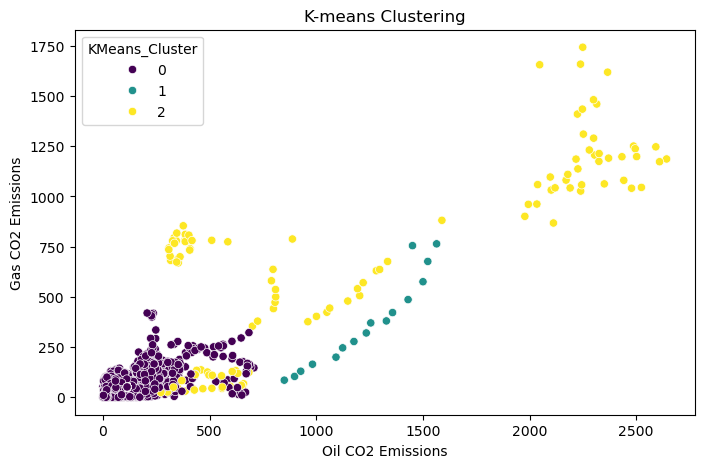

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Select relevant columns for clustering
features = ['Coal_CO2', 'Oil_CO2', 'Gas_CO2', 'Cement_CO2', 'Population']
df_sample_cluster = df_sample[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sample_cluster)

# K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_sample['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize K-means Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_sample['Oil_CO2'], y=df_sample['Gas_CO2'], hue=df_sample['KMeans_Cluster'], palette='viridis')
plt.title('K-means Clustering')
plt.xlabel('Oil CO2 Emissions')
plt.ylabel('Gas CO2 Emissions')
plt.show()




The clustering indicates distinct groups of countries based on their reliance on oil and gas as major sources of CO₂ emissions.
Cluster 2 has highest emission of coal and gas

In [136]:

# Get the unique countries in Cluster 2
cluster_2_countries = df_sample[df_sample['KMeans_Cluster'] == 2]['Country'].unique()

# Print the countries in Cluster 2
print("Countries in Cluster 2:")
for country in cluster_2_countries:
    print(country)


Countries in Cluster 2:
India
China
Russia
United States


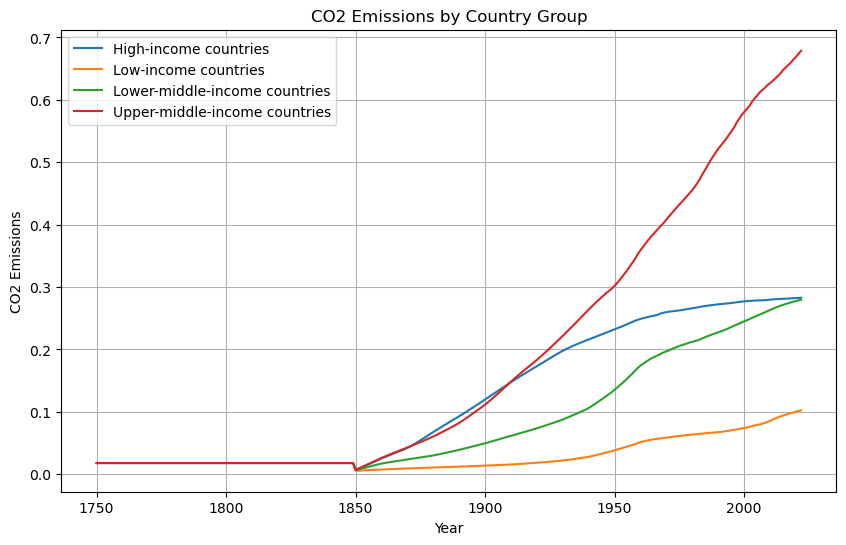

In [144]:
import matplotlib.pyplot as plt

# Filter the rows where Country is one of the specified values
countries_of_interest = ['High-income countries', 'Low-income countries', 
                          'Lower-middle-income countries', 'Upper-middle-income countries']
df_filtered = df[df['Country'].isin(countries_of_interest)]

# Plot CO2 emissions for these countries
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['Country'] == country]
    plt.plot(country_data['Year'], country_data['CO2'], label=country)

plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions by Country Group')
plt.legend()
plt.grid(True)
plt.show()
